# Demographic income

The dataset contains a set of demographic attributes for people in the US.

[Adult UCI Dataset](http://archive.ics.uci.edu/ml/datasets/Adult)

You have to build a model to predict whether their salary is higher or lower than 50K.

# Data exploration

The data is contained in the database file: `../../assets/datasets/adult.sqlite`

Load the data into a Pandas Dataframe

In [1]:
import sqlite3, pandas as pd


In [2]:
conn = sqlite3.connect("../../assets/datasets/adult.sqlite")

df = pd.read_sql("SELECT * FROM adult", con=conn)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


***

## 1. Missing values

Are there any missing values?
How will you deal with them?

Discuss this with your classmate and decide on a strategy for imputation

In [3]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
salary               0
dtype: int64

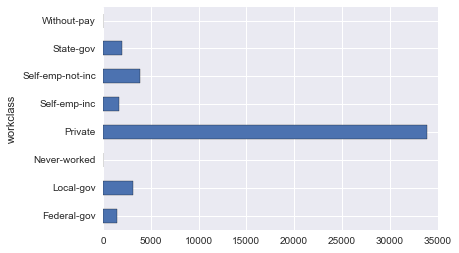

In [4]:
import seaborn as sns
# df['workclass'].unique()
%matplotlib inline

df.groupby('workclass').size().plot(kind="barh")



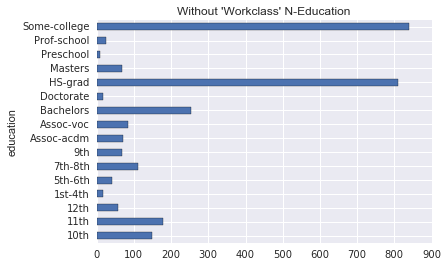

In [29]:
df[df['workclass'].isnull()].groupby('education').size().plot(kind="barh", title="Without 'Workclass' N-Education")

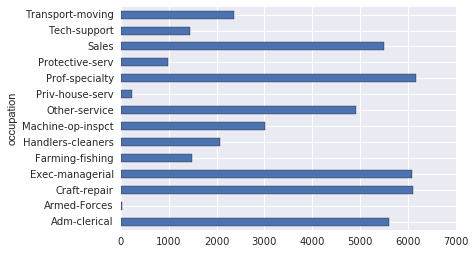

In [30]:
df.groupby('occupation').size().plot(kind="barh")

In [ ]:
df['occupation'].unique()

array([u'Adm-clerical', u'Exec-managerial', u'Handlers-cleaners',
       u'Prof-specialty', u'Other-service', u'Sales', u'Craft-repair',
       u'Transport-moving', u'Farming-fishing', u'Machine-op-inspct',
       u'Tech-support', None, u'Protective-serv', u'Armed-Forces',
       u'Priv-house-serv'], dtype=object)

ERROR! Session/line number was not unique in database. History logging moved to new session 118


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         46043 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        46033 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    47985 non-null object
salary            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


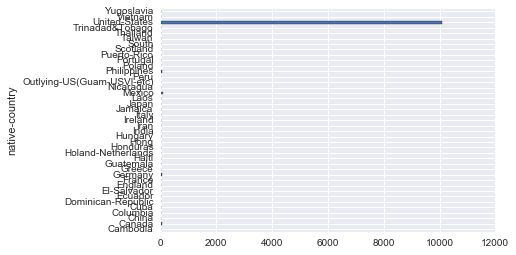

In [9]:
some_college   =  df['education'] == "Some-college"
null_education =  df['occupation'].isnull()


df[(some_college)].groupby(['occupation', 'native-country']).size().plot(kind="barh")

In [35]:
# Deal with missing workclass
def impute_data(row):
    
    # Doing a very cursory imputation
    if type(row['workclass']) != unicode:
        
        # pull most common type for subset slice
        same_hours_per_week = df['hours-per-week'] == row['hours-per-week']
        same_gender = df['sex'] == row['sex']
        
        # set blank working class to most common working class
        # by gender and hours per week
        row['workclass'] = df[(same_hours_per_week) & (same_gender)] \
        .groupby('workclass') \
        .size() \
        .order(ascending=False)[0]

    return row

# Impute missing values
df = df.apply(impute_data, axis=1)




/Users/davidyerrington/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: order is deprecated, use sort_values(...)
/Users/davidyerrington/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/algorithms.py:197: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  t.map_locations(com._ensure_object(uniques))
/Users/davidyerrington/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/algorithms.py:206: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  com._ensure_object(ordered)))
/Users/davidyerrington/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/indexes/base.py:1980: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  tz=getattr(series.dtype, 'tz', None))


In [36]:
df['workclass'].

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## 2. Target

Salary is separated in 2 classes '<=50K' and '>50K'.

Create a new boolean variable called target that is True for salary >50K and False otherwise

## 3. Features
***
The dataset contains many features.

- Are they numerical?
- Are they categorical?

Check them out.

### 3.a Age distribution

What is the distribution of age? How does age correlate with the outcome variable?

- Plot a histogram of the age column
- Separate by target variable and plot the age distribution for the 2 classes

What is clearly visiable between income classes?

### 3.b Categorical Features Distributions

Investigate the relation of each categorical feature with the salary class:

- workclass
- education
- marital-status
- occupation
- relationship
- race
- sex

Use a bar-chart to visualize the relative frequency of each of the  elements in the group.
Use two colors to distinguish between the low and high salary class.

For which features is there significant difference in ratios?

### 3.c Other numerical features distribution

Like you did for age, investigate the distribution of other numerical features for the 2 classes.

## 4. Dummy Columns

Scikit-Learn models require features with numerical values. In order to use all the categorical features in our model, we need to encode them into integers. The way of doing this called 1-Hot Encoding, or dummy column creation.
Both Pandas and Scikit Learn offer an interface to do this.

Example:

|Categorical Feature|Dummy_A|Dummy_B|Dummy_C|
|---|---|---|---|
|A|1|0|0|
|B|0|1|0|
|B|0|1|0|
|C|0|0|1|
|A|1|0|0|
|C|0|0|1|
|B|0|1|0|

- [One Hot Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [Get Dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

> Mainly, we've been using Patsy for this, but you should be aware of these alternatives you can use as well.  Feel free to use Patsy here / setup your design matrix.


## 5. Numerical Features normalization

Numerical Features may have different scales. This can be a problem in some cases, so we can try to normalize or standardize using a scaler.

Use a scaler from Scikit-learn Preprocessing to rescale the numerical features.

[Scikit-Learn Preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html)

Now is a good time to review / discuss the pros/cons of each scaler with a classmate.

## 7. Build and evaluate model

Build a model using KNN or Logistic regression.

Split your data into train and test subset using the following line:

    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
1. Evaluate the `accuracy_score` of your model.
- Display the confusion matrix and the classification report
- Try to improve the model by tuning the parameters by hand. For example:
    - KNN: Change the number of Neighbors
    - LogisticRegression: Change the strength of the regularization
    
Discuss and compare your best model with those around you.


## 8. Gridsearch

Can you optimize any parameters using gridsearch?  Plot the effect of the score given any parameters.

Try to understand:
- The effect of any paramaters
- The the usable range
- Which parameters are most effect
- WHY you would tune or not tune any of the parameters
- The effect of classification metrics (TP, FP, FN, TN, ROC/AUC, etc)
